# Imports

In [1]:
%load_ext autoreload

In [2]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [3]:
dim = (64, 64)

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * dim[0])

# Seed
seed = 42

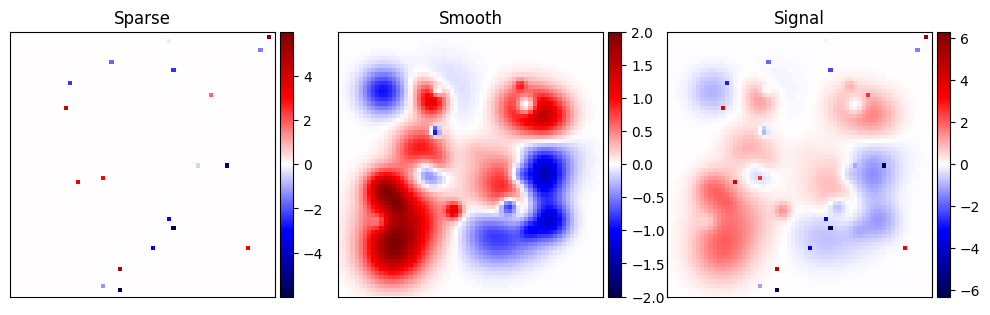

In [8]:
sparse_signal = compute_sparse(dim, sparse_range, density, seed)
smooth_signal = compute_smooth(dim, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

# Operator $\phi$

In [9]:
L = 0.1
theta = 0.5
op = NuFFT(dim, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50 # 10, 20 0.05 - 0.1  pour lambda 1
y = compute_y(y0, psnr)

# Solver

In [14]:
from pyxu.operator import Laplacian

# Loss weights
lambda1 = 1e-2
lambda2 = 5e-1

coupled = True

x1, x2 = solve(y, op, lambda1, lambda2, coupled)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


INFO -- [2023-11-16 13:23:45.378614] Iteration 0
	iteration: 0
	N_iter: 1.0
	RelError[x]: 0.0
INFO -- [2023-11-16 13:23:49.975341] Iteration 500
	iteration: 500
	N_iter: 501.0
	RelError[x]: 0.000956124688080108
INFO -- [2023-11-16 13:23:54.669318] Iteration 1_000
	iteration: 1000
	N_iter: 1001.0
	RelError[x]: 0.0005537894779355443
INFO -- [2023-11-16 13:23:59.242680] Iteration 1_500
	iteration: 1500
	N_iter: 1501.0
	RelError[x]: 0.0004315907021538158
INFO -- [2023-11-16 13:24:04.163935] Iteration 2_000
	iteration: 2000
	N_iter: 2001.0
	RelError[x]: 0.00032273630346529473
INFO -- [2023-11-16 13:24:08.866354] Iteration 2_500
	iteration: 2500
	N_iter: 2501.0
	RelError[x]: 0.0002642416138795576
INFO -- [2023-11-16 13:24:13.378139] Iteration 3_000
	iteration: 3000
	N_iter: 3001.0
	RelError[x]: 0.0002202880722490533
INFO -- [2023-11-16 13:24:17.935863] Iteration 3_500
	iteration: 3500
	N_iter: 3501.0
	RelError[x]: 0.00019375621458453355
INFO -- [2023-11-16 13:24:22.847729] Iteration 4_000
	i

sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x15b6d34c0>


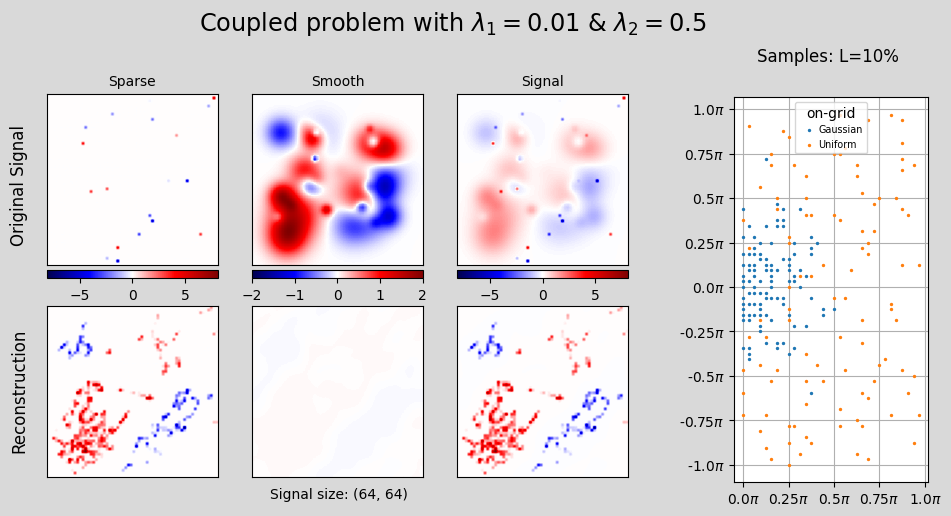

Button(description='SAVE', style=ButtonStyle())

Output()

In [15]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape(dim), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)